In [1]:
import sys
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import thicket as th
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
tk = th.Thicket.from_caliperreader(glob("cali_files/sample/**/*.cali", recursive=True))

(2/2) Creating Thicket: 100%|██████████| 223/223 [00:01<00:00, 147.56it/s]
/home/alex/.local/lib/python3.10/site-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


In [3]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:profile.mpi,spot:region.count,spot:time.exclusive,spot:time.variance,launchdate,libraries,cmdline,cluster,algorithm,programming_model,data_type,size_of_data_type,input_size,input_type,num_procs,group_num,implementation_source,scalability
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10331319,2.11.0,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p64-a262144-ssample-irandom.cali,true,true,true,true,1729584820,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 262144, sample, random]",c,sample,mpi,int,4,262144,random,64,8,online,strong
11176703,2.11.0,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p8-a262144-ssample-isorted.cali,true,true,true,true,1729584432,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 262144, sample, sorted]",c,sample,mpi,int,4,262144,sorted,8,8,online,strong
44362364,2.11.0,256,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p256-a4194304-ssample-i1perturbed.cali,true,true,true,true,1729586306,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 4194304, sample, 1perturbed]",c,sample,mpi,int,4,4194304,1perturbed,256,8,online,strong
52677121,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p32-a262144-ssample-isorted.cali,true,true,true,true,1729584431,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 262144, sample, sorted]",c,sample,mpi,int,4,262144,sorted,32,8,online,strong
180024777,2.11.0,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p64-a67108864-ssample-ireverse.cali,true,true,true,true,1729585033,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 67108864, sample, reverse]",c,sample,mpi,int,4,67108864,reverse,64,8,online,strong
198432937,2.11.0,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p64-a268435456-ssample-ireverse.cali,true,true,true,true,1729585098,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, sample, reverse]",c,sample,mpi,int,4,268435456,reverse,64,8,online,strong
204592576,2.11.0,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p2-a16777216-ssample-isorted.cali,true,true,true,true,1729582637,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 16777216, sample, sorted]",c,sample,mpi,int,4,16777216,sorted,2,8,online,strong
205143107,2.11.0,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p2-a65536-ssample-i1perturbed.cali,true,true,true,true,1729582553,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 65536, sample, 1perturbed]",c,sample,mpi,int,4,65536,1perturbed,2,8,online,strong
205737489,2.11.0,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p128-a268435456-ssample-i1perturbed.cali,true,true,true,true,1729586066,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, sample, 1perturbed]",c,sample,mpi,int,4,268435456,1perturbed,128,8,online,strong


In [4]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

1.635 main
├─ 0.007 MPI_Comm_dup
├─ 0.025 MPI_Comm_split
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Finalized
├─ 0.000 MPI_Init
├─ 0.000 MPI_Initialized
├─ 0.015 comm
│  ├─ 0.011 comm_large
│  │  ├─ 0.000 MPI_Alltoall
│  │  ├─ 0.005 MPI_Alltoallv
│  │  ├─ 0.000 MPI_Gather
│  │  ├─ 0.006 MPI_Gatherv
│  │  └─ 0.000 MPI_Scatter
│  └─ 0.004 comm_small
│     └─ 0.004 MPI_Bcast
├─ 0.003 comp
│  ├─ 0.003 comp_large
│  └─ 0.000 comp_small
├─ 0.000 correctness_check
└─ 0.002 data_init_runtime
   └─ 0.002 MPI_Gather

Legend (Metric: Avg time/rank Min: 0.00 Max: 1.63 indices: {'profile': 10331319})
█ 1.47 - 1.63
█ 1.14 - 1.47
█ 0.82 - 1.14
█ 0.49 - 0.82
█ 0.16 - 0.49
█ 0.00 - 0.16

name User code    ◀  Only in left graph    ▶  Only in right graph



In [5]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_type")
tk.metadata_column_to_perfdata("input_size")
tk.dataframe = tk.dataframe.reset_index()
tk.dataframe.head()

,node,profile,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Variance time/rank,Min time/rank (exc),Max time/rank (exc),Avg time/rank (exc),Total time (exc),Calls/rank (min),Calls/rank (avg),Calls/rank (max),Calls/rank (total),name,num_procs,input_type,input_size
0,"{'name': 'main', 'type': 'function'}",10331319,1.0,regionprofile,1.630478,1.640767,1.634998,104.639859,0.000008,1.570775,1.603376,1.583175,101.323226,NaN,NaN,NaN,NaN,main,64,random,262144
1,"{'name': 'main', 'type': 'function'}",11176703,1.0,regionprofile,0.515263,0.518518,0.517444,4.139550,0.000001,0.466206,0.471041,0.468374,3.746992,NaN,NaN,NaN,NaN,main,8,sorted,262144
2,"{'name': 'main', 'type': 'function'}",44362364,1.0,regionprofile,2.018519,2.039567,2.030380,519.777405,0.000031,1.711620,1.769643,1.735790,444.362298,NaN,NaN,NaN,NaN,main,256,1perturbed,4194304
3,"{'name': 'main', 'type': 'function'}",52677121,1.0,regionprofile,1.605385,1.630287,1.616124,51.715968,0.000117,1.531623,1.563485,1.548124,49.539973,NaN,NaN,NaN,NaN,main,32,sorted,262144
4,"{'name': 'main', 'type': 'function'}",180024777,1.0,regionprofile,4.450656,4.462970,4.455917,285.178714,0.000013,1.556549,1.578473,1.567787,100.338346,NaN,NaN,NaN,NaN,main,64,reverse,67108864


In [6]:
def plot_pandas(df, title, xlabel, ylabel):
    plot = df.plot(kind="line",
    marker='o',
    title=title,
    xlabel=xlabel,
    ylabel=ylabel,
    figsize=(15,7)
    )
    return plot

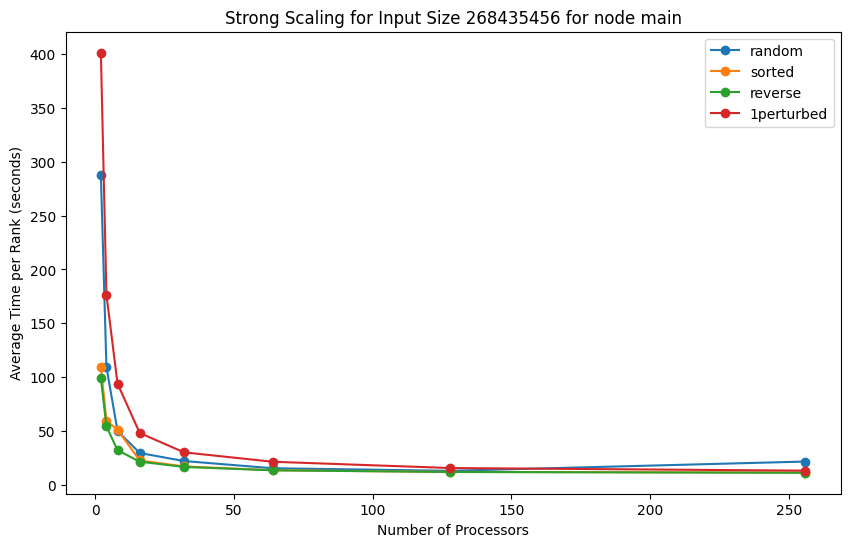

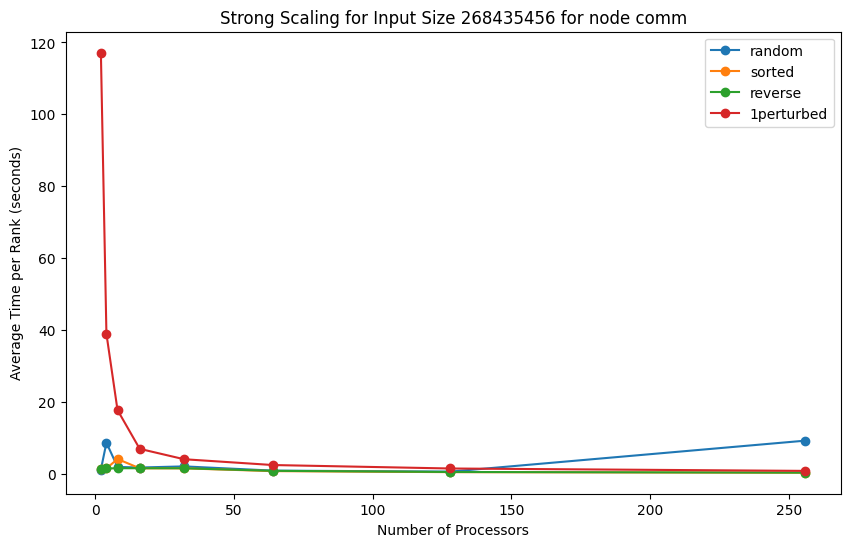

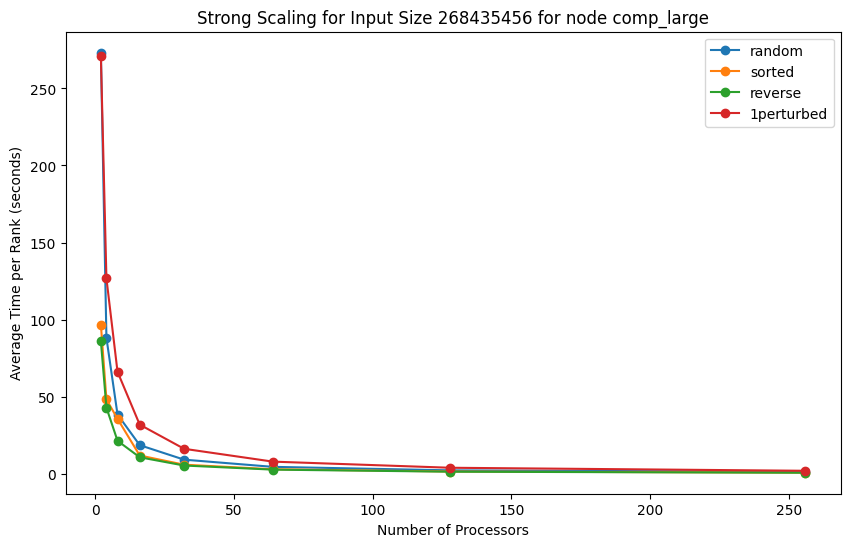

In [7]:
# input_sizes = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]
input_sizes = [268435456]

# Function to create strong scaling plots
def plot_strong_scaling(tk, input_sizes):
    for node in tk.graph.traverse():
        node_name = node.frame['name']
        if (node_name == 'comp_large') or (node_name == 'comm') or (node_name == 'main'):
            for input_size in input_sizes:
                fig, ax = plt.subplots(figsize=(10, 6))
                for input_type in ["random", "sorted", "reverse", "1perturbed"]:
                    data = tk.dataframe[(tk.dataframe["input_type"] == input_type) & (tk.dataframe["input_size"] == input_size) & (tk.dataframe['node'] == node)]
                    data = data.sort_values(by="num_procs")
                    ax.plot(data["num_procs"], data["Avg time/rank"], marker='o', label=input_type)
                ax.set_title(f'Strong Scaling for Input Size {input_size} for node {node_name}')
                ax.set_xlabel('Number of Processors')
                ax.set_ylabel('Average Time per Rank (seconds)')
                ax.legend()
                plt.show()

plot_strong_scaling(tk, input_sizes)

In [ ]:
tk.dataframe = tk.dataframe.reset_index()#.set_index(["node"])
tk.dataframe